In [1]:
import numpy as np
import pandas as pd
import glob
import os
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table
import itertools
from astroquery.simbad import Simbad
from utils import PLOT_PARAMS
from astropy import constants as const
from matplotlib import colors
PLOT_PARAMS()
import thejoker as tj
import random
random.seed(42) 
from astropy.time import Time
from datetime import datetime

from astropy.coordinates import EarthLocation
from scipy.optimize import newton
import thejoker as tj
import pymc as pm
import corner
import arviz as az

from datetime import date
today=date.today()
DATE =today.strftime("%m_%d_%y")
print(DATE)
import pickle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

vlt = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

09_20_25


In [2]:
galah_vac = Table.read('../../lithium/data/GALAH_DR3_VAC_ages_v2.fits').to_pandas()


In [3]:
rv_df = pd.read_csv('rv_df.csv')

In [4]:
comb_df = pd.read_csv('combined_rvs.csv')


In [5]:
binary_list_113 = [9, 11, 16, 18, 19, 23,] # old: 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = [6, 7, 23] #old: 5, 6, 7, 23 #13 removed because of dipper star

In [6]:
# comb_df

In [7]:
def func1(logg):
    a, b = -0.60, 3.31
    log_v = a*logg+b
    return 10.**log_v
    
def func2(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+3.5*siga
    b = b+3.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func3(logg):
    siga, sigb = -0.04, -0.10
    a, b = -0.60, 3.31
    a = a+3.5*siga
    b = b+3.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func_2sigma(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+2*siga
    b = b+2*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
def func4(logg):
    siga, sigb = 0.04, 0.10
    a, b = -0.60, 3.31
    a = a+1.5*siga
    b = b+1.5*sigb
    log_v = (a*logg+b)
    return 10.**log_v
    
                

In [8]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors



In [9]:
def clean_up(df,source):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[(comb_df.GALAH_ID==galah_id) & (comb_df.source==source)]

    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    
    return time, rv, err, source, dtemp

x = clean_up(rv_df[(rv_df.RG_id==1) & (rv_df.program==112)],source='ESPRESSO')


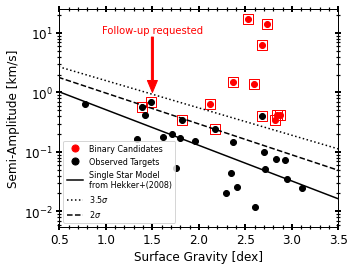

In [10]:
PLOT_PARAMS(LS=12, SIZE=12)
def make_semiK_plot():
    plt.figure(figsize=(5,4))
    ax=plt.subplot(111)
    for i, row in rv_df.iterrows():
        _, rv, _, _, _ = clean_up(rv_df[(rv_df.RG_id==row.RG_id) & (rv_df.program==row.program)],source='ESPRESSO')
        semiK = (max(rv) - min(rv))/2.
        
        if row.program==112:
            if row.RG_id in binary_list_112:
                plt.scatter(row.logg, semiK,c='r')
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
            elif semiK > (func4(row.logg)/1000.) :#and row.logg<2.:
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
                plt.scatter(row.logg, semiK,c='k')

            else:
                plt.scatter(row.logg, semiK,c='k')
        if row.program==113:
            if row.RG_id in binary_list_113:
                plt.scatter(row.logg, semiK,c='r')
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
            elif semiK > (func4(row.logg)/1000.) :#and row.logg<2.:
                plt.scatter(row.logg, semiK,ec='r', marker='s',s=100, fc='None')
                plt.scatter(row.logg, semiK,c='k')
            else:
                plt.scatter(row.logg, semiK,c='k')
                
#       
    
    x = np.linspace(0.,4, 100)
    y1 = func1(x)/1000.
    y2 = func2(x)/1000.
    y3 = func3(x)/1000.
    y4 = func_2sigma(x)/1000.
    plt.plot(x,y1, c='k')
    plt.plot(x,y2, c='k',ls='dotted',label=r'3.5$\sigma$')
    plt.plot(x,y4, c='k',ls='dashed')
    plt.legend()
    plt.xlim(0.5,3.5)
#     plt.axvspan(2.0,3.0, color='green',alpha=0.2,zorder=0)
    plt.yscale('log')
    plt.xlabel('Surface Gravity [dex]')
    plt.ylabel('Semi-Amplitude [km/s]')
    
    plt.annotate('Follow-up requested',  # The text to display
                xy=(1.5, 1),  # The point the arrow points to (x, y coordinates)
                xytext=(1.5, 10),  # The position of the text (x, y coordinates)
                arrowprops=dict(color='r', width=2.,headwidth=10),  # Properties of the arrow
                fontsize=10,
                color='r',ha='center'
            )
    
    lgnd = [Line2D([0], [0], marker='o', mec='r',mfc='r',ms=np.sqrt(50),ls='',label='Binary Candidates'), 
            Line2D([0], [0], marker='o', mec='k',mfc='k',ms=np.sqrt(50),ls='',label='Observed Targets'), 
#             Line2D([0], [0], marker='s', mec='r',mfc='None',ms=np.sqrt(100),ls='',label='Follow-up Requested'), 
            Line2D([0], [0], mec='k',c='k',ls='solid',label='Single Star Model\nfrom Hekker+(2008)'),
            Line2D([0], [0], c='k',ls='dotted',label='3.5$\sigma$'),
            Line2D([0], [0], c='k',ls='dashed',label='2$\sigma$')
           ]
    ax.legend(handles=lgnd,fontsize=8)

#     ,label='',,label=''
make_semiK_plot()
# plt.savefig('../p117_plot.png',bbox_inches='tight',dpi=200)

In [11]:

# Example: Observer at Mauna Kea Observatory
vlt_location = EarthLocation.of_site('paranal')  # the easiest way... but requires internet

location = EarthLocation.from_geodetic(lon=vlt_location.lon, lat=vlt_location.lat, height=vlt_location.height)


In [12]:

# Example datetime object
p117_start = datetime(2026, 5, 1, 12, 0, 0)
p117_end   = datetime(2027, 4, 30, 12, 0, 0)

# Convert to astropy Time object, specifying the scale (e.g., UTC)
tstart = Time(p117_start, scale='utc')
tend   = Time(p117_end, scale='utc')

tstart = Time(p117_start, scale='utc', location=location)
tend   = Time(p117_end, scale='utc', location=location)

# 4. Calculate the Barycentric Julian Date (BJD)
# bjd = t.bjd
print(tstart.mjd)
print(tend.mjd)

# Calculate BJD, specifying the observer's location
# bjd_start = tstart.light_travel_time(location).jd  # This calculates BJD_TDB
# bjd_end   = tend.light_travel_time(location).jd  # This calculates BJD_TDB

61161.5
61525.5


In [13]:
dftemp  = rv_df[(rv_df.RG_id==23) & (rv_df.program==112)]

# galah_vac[galah_vac.sobject_id==170514002101318].m_act_bstep


In [14]:
def convert_mjd_to_jd(mjd):
    t = Time(mjd, format='mjd', scale='local')
    return t.mjd

version = 1

In [15]:
p117_start_mjd = 61161.5
p117_end_mjd   = 61525.5


In [16]:
PLOT_PARAMS(SIZE=10,LS=10)
def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def get_vr(time_grid, t0, K, omega, M0, P, e, v0):
    # omega: argument of periastron (rad)
    
    # Compute RV curve
    vr = []
    
    # use first time step to find phi0
    
    phi0 = 2*np.pi*t0/P - M0
    
    for i,ti in enumerate(time_grid):
        if i == 0:
            E = newton(kepler_eq, M0, args=(M0, e))
            nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                                np.sqrt(1 - e) * np.cos(E / 2))
            v = K * (np.cos(nu + omega) + e * np.cos(omega))

        else:
            M = 2 * np.pi * ti / P - phi0
            E = newton(kepler_eq, M, args=(M, e))
            nu = 2 * np.arctan2(np.sqrt(1 + e) * np.sin(E / 2),
                                np.sqrt(1 - e) * np.cos(E / 2))
            v = K * (np.cos(nu + omega) + e * np.cos(omega))
        vr.append(v)

    vr_kms = np.array(vr)
    vr     = vr_kms  + v0
    
    return vr


[60455.31590345 60473.35703503 60489.37269492 60506.08668542
 60526.12898924] [14.58151513 14.97103738 15.48562807 16.29001445 17.34191933]
11 21
6 9
[11.02922979 11.02852922 11.0278288  ...  8.50959317  8.50978062
  8.50996826]
[]
[46, 28, 17, 65]
(98, 4)
4
0 46 24.580256415870352
1 28 21.971185172370852
2 17 17.59855562422578
3 65 34.55771016921707
[61166.5        61286.16666667 61405.83333333 61525.5       ]
[24.580256415870352, 21.971185172370852, 17.59855562422578, 34.55771016921707]


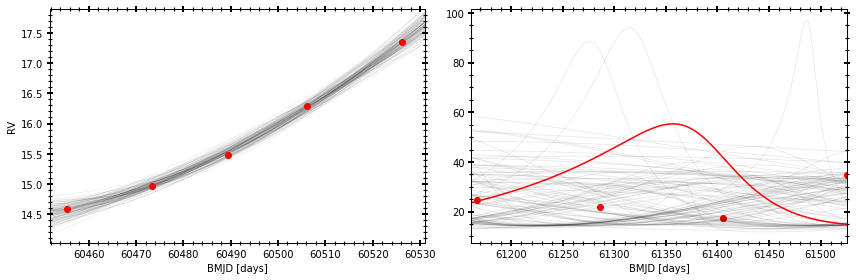

In [253]:

def plot_one_star(program, obj, time=False, rv=False, N=1, ylim=False,xlim=False,n_sample=5):
    
#     if time is False:
    target_time, target_rv, _, _, _ = clean_up(rv_df[(rv_df.RG_id==obj) & (rv_df.program==program)], source='ESPRESSO')
    idx = np.argsort(target_time)
    target_time, target_rv = target_time[idx], target_rv[idx]

    t0 = min(target_time)
    
    data = Table()
    data["bjd"]     = target_time
    data["rv"]      = target_rv
    target_time = Time(data["bjd"], format="jd", scale="tcb")

    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    
    fig = plt.figure(figsize=(12,4))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    print(target_time.mjd, target_rv)
    current_time = np.linspace(min(target_time.mjd)-100, max(target_time.mjd)+100, 10000)
    future_time  = np.linspace(p117_start_mjd-2, p117_end_mjd+2, 10000)
    
    t1 = Time(current_time, format="mjd", scale="tcb")
    t2 = Time(future_time, format="mjd", scale="tcb")

    n_plot = n_sample
    Q = 4.0  # HACK
    line_alpha = 0.05 + Q / (n_plot + Q)
    
    all_future_orbits = []
    
    for n_sample in range(n_sample):
        current_orbit = joker_samples.get_orbit(n_sample).radial_velocity(t1)
        future_orbit  = joker_samples.get_orbit(n_sample).radial_velocity(t2)
        ax1.plot(current_time, current_orbit,c='k',alpha=line_alpha,lw=0.5)
        ax2.plot(future_time, future_orbit,c='k',alpha=line_alpha,lw=0.8)
        all_future_orbits.append(np.array(future_orbit))
    ax1.scatter(target_time.mjd, target_rv, c='r',zorder=100)
    
    #ax1.set_xlim(min(target_time)-2,max(target_time)+2)
    
    ax2.set_xlim(p117_start_mjd,p117_end_mjd)

    plt.plot(future_time, joker_samples.get_orbit(22).radial_velocity(t2), c='r')

    
    t1 = Time(61000, format='mjd')
    t2 = Time(61200, format='mjd')

    m1,d1 = t1.datetime.month,t1.datetime.day
    m2,d2 = t2.datetime.month,t2.datetime.day 
    print(m1,d1)
    print(m2,d2)
    
    plt.tight_layout()
    ax1.set_ylabel('RV')

    for ax in [ax1,ax2]:
        ax.set_xlabel('BMJD [days]')
        
    if ylim:
        ax1.set_ylim(ylim)
#         ax2.set_ylim(ylim)
    if xlim:
        ax1.set_xlim(xlim)
    
    # replace xticks:
    xticks = ax2.get_xticks()

    all_future_orbits = np.array(all_future_orbits)
    std_future_orbits = np.std(all_future_orbits, axis=0)
    print(std_future_orbits)
#     idx = np.argmax(std_future_orbits)
#     y = std_future_orbits[idx]
#     print(future_time[idx],y)
#     x = future_time[np.argmax(std_future_orbits)]
    
    
    
#     idx = np.argsort(std_future_orbits)
    idx = [x[0] for x in sorted(enumerate(std_future_orbits), key=lambda x: x[1])[-10:]]

    
    xx = []
    
    for n_sample in range(n_sample):
        t = Time(61376.5, format='mjd')
        future_orbit  = joker_samples.get_orbit(n_sample).radial_velocity(t)
        xx.append(future_orbit)

    # simulate
    ntimes = 4
    simulate_time = np.linspace(p117_start_mjd +5, p117_end_mjd, ntimes)
    simulate_time = Time(simulate_time, format="mjd", scale="tcb")
    
    simulate_orbits = []
    
    for n_sample in range(n_sample):
        future_orbit  = joker_samples.get_orbit(n_sample).radial_velocity(simulate_time)
        simulate_orbits.append(future_orbit)
        
    rnd = np.random.default_rng(seed=42)


    simulate_orbits = np.array(simulate_orbits)
    random_ints = [random.randint(0, n_sample) for i in range(ntimes)]
    
    simulate_rv = []
    
    print(simulate_rv)
    print(random_ints)
    print(np.shape(simulate_orbits))
    print(len(simulate_orbits[0]))
    
    for i,col in enumerate(range(ntimes)):
        row = random_ints[i]
        
        print(i,row, simulate_orbits[row,i])
        simulate_rv.append(simulate_orbits[row,i])
    print(simulate_time)
    print(simulate_rv)
    ax2.scatter(simulate_time.value, simulate_rv, c='r')
    return simulate_time.value, simulate_rv
#         for row in random_ints:
#             print(col,row)
    
    
        
        
#     idx = np.argmax(xx)
#     print(range(n_sample)[idx])
    
    
#     x, y = future_time[idx],std_future_orbits[idx]
#     ax2.plot(future_time,std_future_orbits)
    
#     ax2.plot(x,y,c='r')#,s=300)
#     ax2.set_ylim(5,20)
#     print(x,y)
#     diff = np.linspace(p117_start_mjd +5, p117_end_mjd, 6)
#     diff_t = Time(diff, format="mjd", scale="tcb")
    
#     want_orbit = joker_samples.get_orbit(22).radial_velocity(diff_t)
#     print(list(diff))
#     print(np.array(want_orbit))
    
    
#     for i in diff:
#         print(i)
#         plt.axvline(i+30,c='r')
    
    
simulate_time, simulate_rv = plot_one_star(113, 23, N=2,n_sample=100,
              xlim=(60451.77524916038, 60531.11762218476),
              ylim=(14.02943429160872, 17.894000166091878)
             )
plt.tight_layout()

# plt.subplots_adjust(wspace=0.15)
# plt.savefig('../p117_plot_2.png',bbox_inches='tight',dpi=200)

plt.show()


In [213]:
t1 = [60455.31590345, 60473.35703503 ,60489.37269492 ,60506.08668542, 60526.12898924,]
rv1 = [14.58151513 ,14.97103738 ,15.48562807, 16.29001445 ,17.34191933]
t1  = np.concatenate([t1, simulate_time])
rv1  = np.concatenate([rv1, simulate_rv])

rv_err = [0.1]*len(t1)

error range: 0.10-0.10
running joker for posterior samples...
# of joker samples returned second round: 2


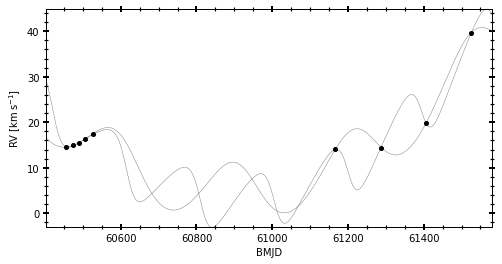

In [215]:
def test_tj(time, rv, err, Pi,Pf,K0=20, max_posterior=256, error=0.1,chains=2, prior_size=50_000,save=False,MCMC=False):
    plt.rcParams['figure.facecolor']    = 'white'

    
#     time, rv, err = np.array(time), np.array(rv), np.array(err)

    '''if program == 113 and obj in [5, 16, 11, 21, 18]: #exclude galah data point
        mask = (time >= 2460000.)
        time, rv, err = time[mask], rv[mask], err[mask]
    elif program == 112 and obj in [7, 23]:  #exclude galah data point
        mask = (time >= 2460000.)
        time, rv, err = time[mask], rv[mask], err[mask]
    '''
    
    data           = Table()
    data['bjd']    = time
    data['rv']     = rv
    data['rv_err'] = err

    print('error range: %.2f-%.2f' % (min(err),max(err)))
    
    t = Time(data["bjd"], format="mjd", scale="tcb")
    
    rnd = np.random.default_rng(seed=42)
    
    data = tj.RVData(t=t, rv=data["rv"]*u.km/u.s, rv_err=data["rv_err"]*u.km/u.s)
    
    with pm.Model() as model:
        #P_prior = xu.with_unit(pm.Uniform("P", 0.25, 1e3), u.day)
        #M0_prior    = xu.with_unit(pm.Uniform("M0", -np.pi, np.pi), u.radian)
        #omega_prior = xu.with_unit(pm.Uniform("omega", -np.pi, np.pi), u.radian)
        
        #s_prior = xu.with_unit(pm.Normal("s", 0, 0.5), u.km/u.s)
        #K_prior = xu.with_unit(pm.Normal("K", 0, 20), u.km/u.s)
        #e_prior = xu.with_unit(pm.Uniform("e", 0, 1), u.one)
        
        # Allow extra error to account for under-estimated error bars
#         s = xu.with_unit(pm.Lognormal("s", 0, 0.5), u.km / u.s)

        prior = tj.JokerPrior.default(
                P_min = Pi * u.day, # to use Joker's default log-normal, give P-min, P-max
                P_max = Pf * u.day,
                sigma_K0 = K0 * u.km / u.s,
                sigma_v=[100 * u.km / u.s, 
                          0.5 * u.km / u.s / u.day, 
                          1e-2 * u.km / u.s / u.day**2],
                poly_trend=3,
#                 s=s,
            
        )

    prior_samples = prior.sample(size=prior_size, rng=rnd)
    
    joker = tj.TheJoker(prior, rng=rnd)


    print('running joker for posterior samples...')
    joker_samples = joker.rejection_sample(data, prior_samples, 
                                           max_posterior_samples=max_posterior,
                                           return_all_logprobs=True)
    print('# of joker samples returned second round:',len(joker_samples[0]))

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    _ = tj.plot_rv_curves(
            joker_samples[0],
            data=data,
            ax=ax,
        )
#         if save: fig.savefig('../joker_samples/%s_RG%s_%s.png'%(program,obj,DATE),bbox_inches='tight',dpi=100)

    return prior_samples, joker_samples, -999, -999, prior.par_names#az.summary(trace, var_names=prior.par_names)
        
_, joker_samples, _, _, _ = test_tj(t1, rv1, rv_err, Pi=1, Pf=3000)


[60455.31590345 60473.35703503 60489.37269492 60506.08668542
 60526.12898924] [14.58151513 14.97103738 15.48562807 16.29001445 17.34191933]


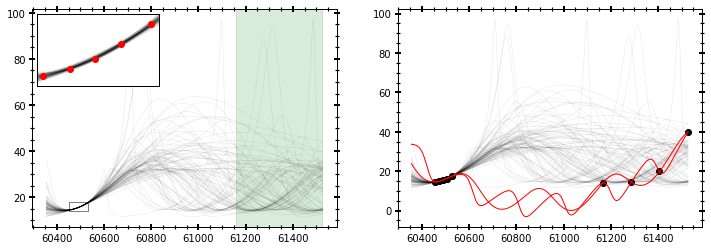

In [252]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def make_plot(program, obj, new_samples, new_time, new_rv, time=False, rv=False, N=1, ylim=False,xlim=False,n_sample=5):
    
#     if time is False:
    target_time, target_rv, _, _, _ = clean_up(rv_df[(rv_df.RG_id==obj) & (rv_df.program==program)], source='ESPRESSO')
    idx = np.argsort(target_time)
    target_time, target_rv = target_time[idx], target_rv[idx]

    t0 = min(target_time)
    
    data = Table()
    data["bjd"]     = target_time
    data["rv"]      = target_rv
    target_time = Time(data["bjd"], format="jd", scale="tcb")

    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    
    fig = plt.figure(figsize=(12,4))
    ax1 = plt.subplot(121)
    ax3 = plt.subplot(122)
#     ax3 = plt.subplot(133)
    inset_ax = inset_axes(ax1, width="40%", height=1., loc="upper left")

    print(target_time.mjd, target_rv)
    current_time = np.linspace(min(target_time.mjd)-100, max(target_time.mjd)+100, 10000)
    future_time  = np.linspace(p117_start_mjd-2, p117_end_mjd+2, 10000)
    all_time = np.linspace(min(target_time.mjd)-100, p117_end_mjd+2, 10000)
    
    t1 = Time(all_time, format="mjd", scale="tcb")
#     t2 = Time(future_time, format="mjd", scale="tcb")

    n_plot = n_sample
    Q = 4.0  # HACK
    line_alpha = 0.05 + Q / (n_plot + Q)
    
    
    for n_sample in range(n_sample):
        orbit = joker_samples.get_orbit(n_sample).radial_velocity(t1)
    
        ax1.plot(all_time, orbit,c='k',alpha=line_alpha,lw=0.5)
        #ax2.plot(all_time, orbit,c='k',alpha=line_alpha,lw=0.5)
        ax3.plot(all_time, orbit,c='k',alpha=line_alpha,lw=0.5)
        inset_ax.plot(all_time, orbit,c='k',alpha=line_alpha,lw=0.5)
        
    for i in range(len(new_samples)):
        orbit = new_samples.get_orbit(i).radial_velocity(t1)
        ax3.plot(all_time, orbit,c='r',alpha=1,lw=1)

    ax3.scatter(target_time.mjd, target_rv, c='r')
    ax3.scatter(new_time, new_rv, c='k')

    ax1.axvspan(p117_start_mjd,p117_end_mjd ,color='green',alpha=0.15,zorder=0)
    
    
    xlim=(60451.77524916038, 60531.11762218476)
    ylim=(14.02943429160872, 17.894000166091878)
    
    inset_ax.scatter(target_time.mjd, target_rv, c='r',zorder=100)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xticks([]); 
    plt.yticks([])  # strip ticks, which collide w/ main ax

    # add zoom leaders
    ax1.indicate_inset_zoom(inset_ax, edgecolor="k")
    
    #     t = Time(np.array(xticks), format='mjd')
#     dt_object = t.datetime
#     xlabels = [i.strftime('%b %Y') for i in dt_object]
#     ax.set_xticklabels(xlabels)
    new_samples

make_plot(113, 23, joker_samples[0], t1, rv1, n_sample=100,)

In [19]:
ss

NameError: name 'ss' is not defined

In [ ]:
rv precious in harps of red giants, non-neglible have intrinstic scatter due to convective motion, 
monthly cadence will be sufficient will be ale to tease out binarity 

show posteriors before and after with just 6 data points with a different color

* double check what eso means by SNR (per pixel, per resolution, at what wavelength)




In [ ]:

plot_one_star(112, 23, N=20, ylim=(-22,9), xlim=(60345, 60390))  

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
# plt.savefig('../p117_plot_2.png',bbox_inches='tight',dpi=200)
plt.show()



In [ ]:
ss

In [ ]:
plot_tj(rv_df, 23 , 113, N=2)


In [ ]:
plot_tj(rv_df, 23 , 112, N=2)


In [41]:
def clean_up0(df):
    galah_id = df.sobject_id.values[0]
    dtemp    = comb_df[(comb_df.GALAH_ID==galah_id)]

    time = dtemp['time'].to_numpy()
    rv   = dtemp['rv'].to_numpy()
    err  = dtemp['rv_err'].to_numpy()
    source  = dtemp['source'].to_numpy()
    
    return time, rv, err, source, dtemp


[2460455.81590345 2460473.85703503 2460489.87269492 2460506.58668542
 2460526.62898924]
341 23 113
rv1 [14.58151513 14.97103738 15.48562807 16.29001445 17.34191933]
      bjd       
----------------
2460455.81590345
2460473.85703503
2460489.87269492
2460506.58668542
2460526.62898924
rv2        rv       
     km / s     
----------------
14.5815151308206
14.9710373837021
15.4856280741578
 16.290014447224
  17.34191932688
an_orbit [14.59263963 14.93329765 15.43330131 16.15893646 17.30419805] km / s
t [2460455.81590345 2460473.85703503 2460489.87269492 2460506.58668542
 2460526.62898924]
t.mjd [60455.31590345 60473.35703503 60489.37269492 60506.08668542
 60526.12898924]


rv3 [14.5815151308206, 14.9710373837021, 15.4856280741578, 16.290014447224, 17.34191932688]
[60455.3159034499, 60473.357035030145, 60489.37269491982, 60506.086685420014, 60526.128989240155]
P 683.6120385159569 d
e 0.23661727408591862
omega -1.6197269695966126 rad
M0 0.37231254598643054 rad
s 1.905047087152572 km / s
K -1

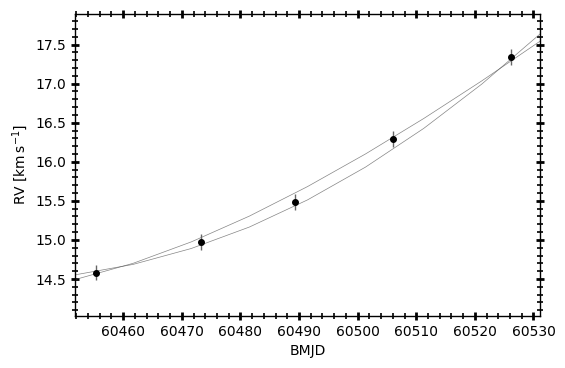

In [45]:
version = 1
def plot_tj(df, obj,program,N=100):
    fig= plt.figure(dpi=100)
    ax=plt.subplot(111)
    dftemp  = df[(df.RG_id==obj) & (df.program==program)]
    time, rv, rv_err, source, dft = clean_up0(dftemp)
    dft

    idx = np.argsort(time)
    time, rv, rv_err, source = time[idx], rv[idx], rv_err[idx], source[idx]
    time, rv, rv_err, source = time[1:], rv[1:], rv_err[1:], source[1:]
    rv_err                = np.array(rv_err)
    rv_err[(rv_err<0.10)] = 0.10
    print(time)
    fname   = '../joker_samples/%s_%s_joker_%s.hdf5'%(program,obj,version)
    joker_samples = tj.JokerSamples.read(fname)
    print(len(joker_samples),obj, program)

    print('rv1',rv)
    data = Table()
    data['bjd']     = time
    data['rv']      = rv
    data['rv_err']  = rv_err
    data["rv"].unit = u.km / u.s
    data["rv_err"].unit = u.km / u.s
    print(data['bjd'])
    t = Time(data["bjd"], format="jd", scale="tcb")
    
    print('rv2',data['rv'])
    
    an_orbit = joker_samples.get_orbit(1).radial_velocity(t)
    print('an_orbit',an_orbit)
    print('t',t)
    print('t.mjd',t.mjd)
    
    print('\n')

#     print(t)
    new_data = tj.RVData(
        t=t,
        rv=u.Quantity(data["rv"]),
        rv_err=u.Quantity(data["rv_err"]))
    print('rv3',list(new_data.rv.value))
    print(list(new_data.t.value))

    x = tj.plot_rv_curves(joker_samples[:N], data=new_data,ax=ax, add_labels=True)

    for n in range(N):
        sample = joker_samples[n]
        for param in ['P', 'e', 'omega', 'M0', 's', 'K', 'v0']:
            print(param,sample[param][0])
        print('\n')
    print(ax.get_xlim())
    print(ax.get_ylim())
    
#     print(joker_samples[:N][0]['v0'][0].value,joker_samples[:N][0]['e'][0].value,joker_samples[:N][0]['K'][0].value)
    
plot_tj(rv_df, 23 , 113, N=2)



In [ ]:

plot_one_star(113, 23,
              time = [60455.3159034499, 60473.357035030145, 60489.37269491982, 60506.086685420014, 60526.128989240155],
              rv = [14.5815151308206, 14.9710373837021, 15.4856280741578, 16.290014447224, 17.34191932688],
              N=2)#, ylim=(14,18)) 
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()


In [ ]:
plot_tj(rv_df, 23 , 113, N=2)
